In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download the Vertebral Column Data Set from: https://archive.ics.uci. edu/ml/datasets/Vertebral+Column.

In [2]:
from scipy.io import arff

column_2C_data = arff.loadarff('../vertebral_column_data/column_2C_weka.arff')

df_column_2C_data = pd.DataFrame(column_2C_data[0])


In [3]:
df_column_2C_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


## Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

NO=0 and AB=1.1


In [4]:
# Replace 'b'Abnormal'' with 0 and 'b'Normal'' with 1 in the 'class' column
df_column_2C_data['class'] = df_column_2C_data['class'].replace({b'Abnormal': 1, b'Normal': 0})
df_column_2C_data.head(2)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1


ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).



I used seaborn pairplot,  then use plt.scatterplot  for double check. 

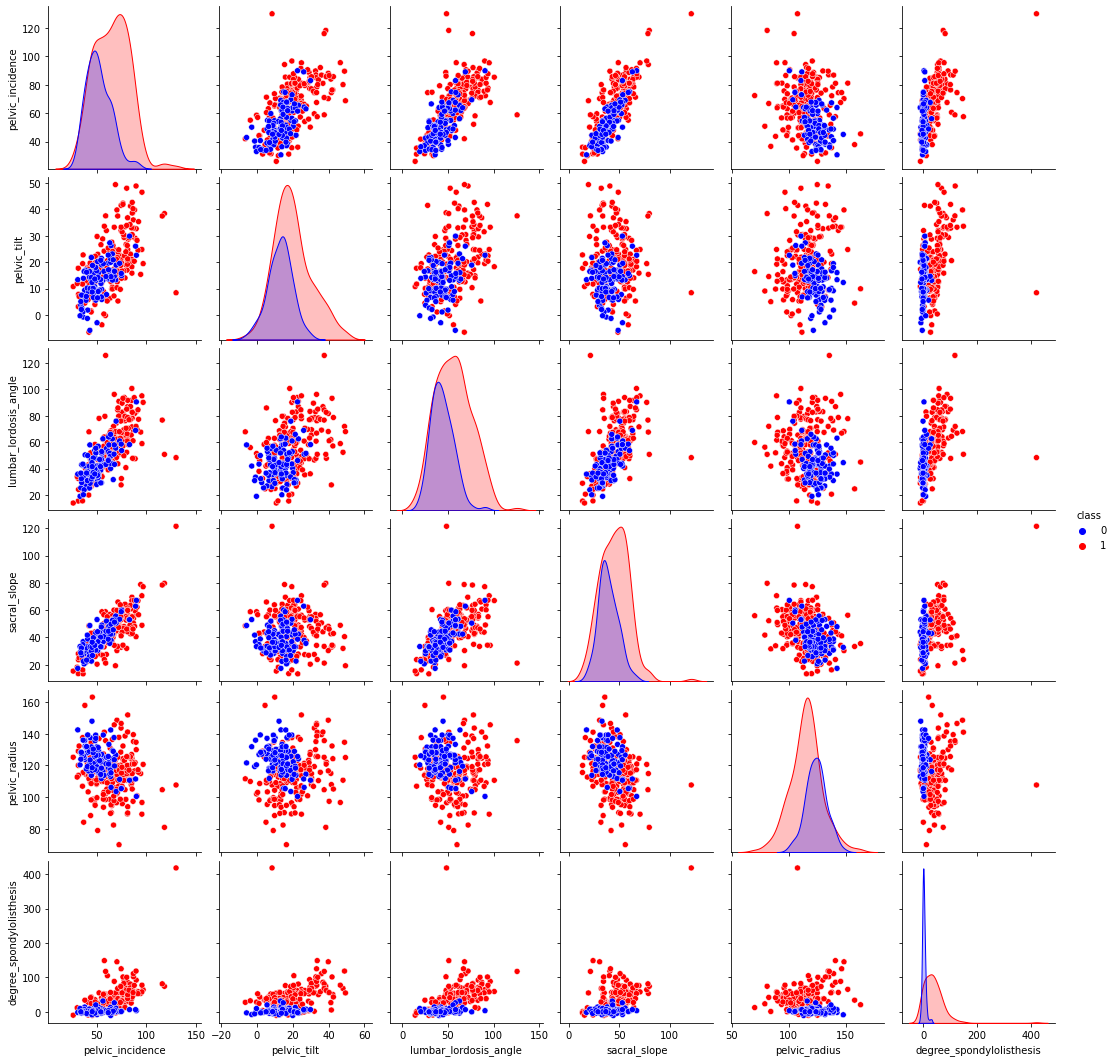

In [5]:
sns.pairplot(df_column_2C_data, hue='class', palette={0: 'blue', 1: 'red'})

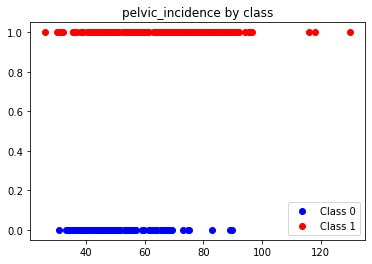

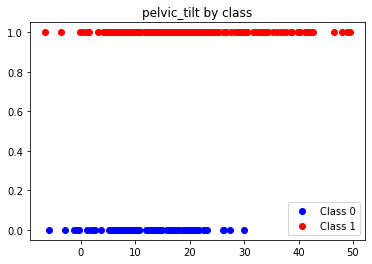

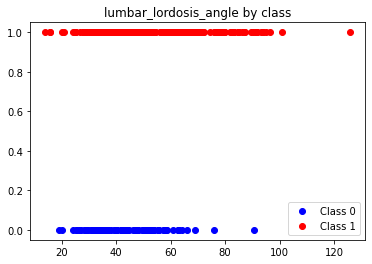

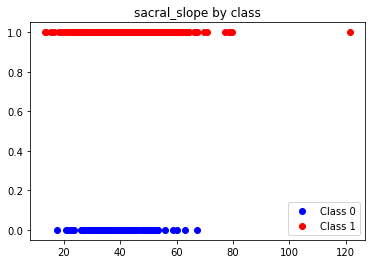

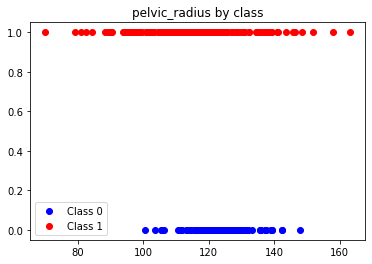

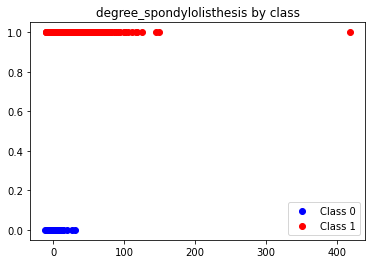

In [6]:
class_0_data = df_column_2C_data[df_column_2C_data['class'] == 0]
class_1_data = df_column_2C_data[df_column_2C_data['class'] == 1]
independent_variables = df_column_2C_data.columns[:-1]
for i in independent_variables:
# Assuming 'independent_variable_1' and 'independent_variable_2' are your independent variables
    plt.scatter(class_0_data[f'{i}'], class_0_data['class'], c='blue', label='Class 0')
    plt.scatter(class_1_data[f'{i}'], class_1_data['class'], c='red', label='Class 1')
    plt.legend()
    plt.title(f'{i} by class')
    plt.show()
# Add labels and legend

PathPatch12((0.925, 42.8178) ...) blue
PathPatch12((1.925, 50.1025) ...) red


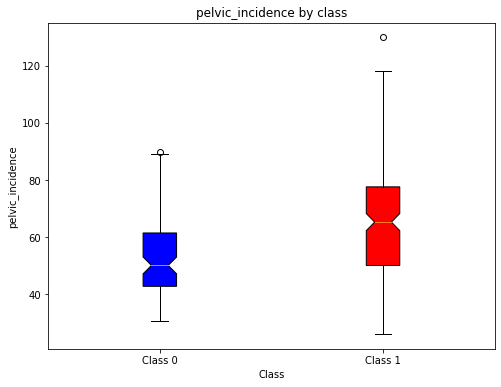

PathPatch12((0.925, 8.79995) ...) blue
PathPatch12((1.925, 13.0481) ...) red


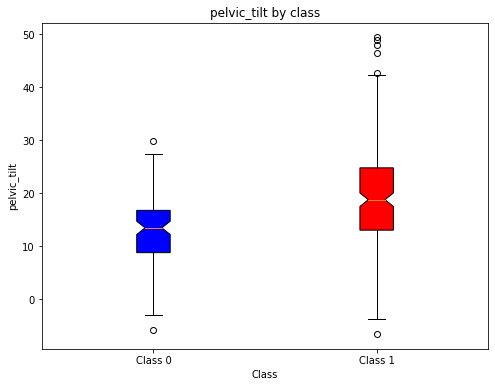

PathPatch12((0.925, 35) ...) blue
PathPatch12((1.925, 41.117) ...) red


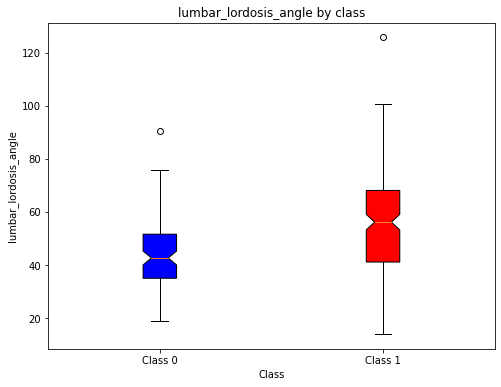

PathPatch12((0.925, 32.3405) ...) blue
PathPatch12((1.925, 34.3803) ...) red


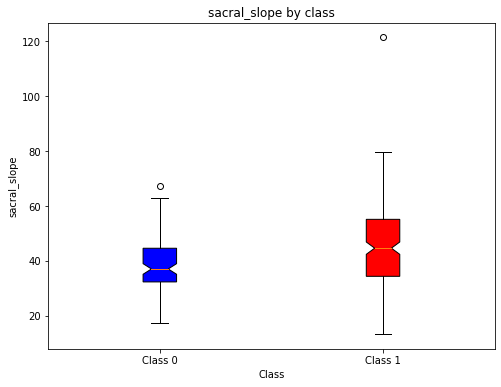

PathPatch12((0.925, 118.183) ...) blue
PathPatch12((1.925, 107.309) ...) red


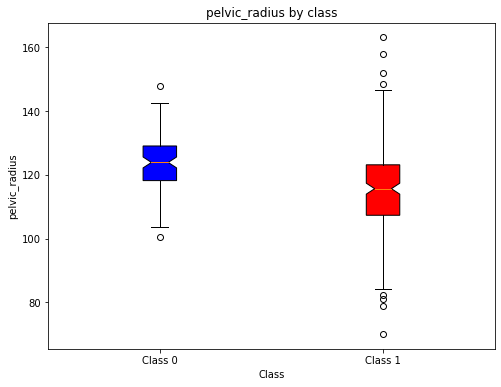

PathPatch12((0.925, -1.51136) ...) blue
PathPatch12((1.925, 7.26323) ...) red


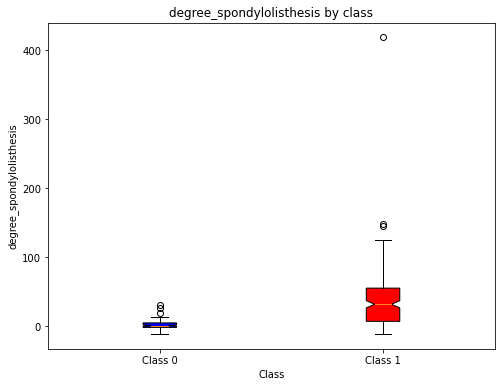

In [7]:
class_colors = {'Class 0': 'blue', 'Class 1': 'red'}

for i in independent_variables:
    
    plt.figure(figsize=(8, 6))
    bp=plt.boxplot([class_0_data[i],class_1_data[i]], labels=['Class 0', 'Class 1'], notch=True, patch_artist=True)
    for box, color in zip(bp['boxes'], [class_colors['Class 0'], class_colors['Class 1']]):
        print(box,color)
        box.set_facecolor(color)

    plt.title(f'{i} by class')
    plt.xlabel('Class')
    plt.ylabel(i)
    plt.show()

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [8]:
first_70_0=class_0_data[:70]
first_140_1=class_1_data[:140]
Training_data = pd.concat([first_70_0, first_140_1], ignore_index=True)

rest_70_0=class_0_data[70:]
rest_140_1=class_1_data[140:]
Testing_data = pd.concat([rest_70_0, rest_140_1], ignore_index=True)


In [9]:
Training_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
205,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
206,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
207,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
208,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [10]:
from sklearn.neighbors import KNeighborsClassifier


## (c) Classification using KNN on Vertebral Column Data Set


i Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

In [11]:
X_train = Training_data.drop('class', axis=1)
y_train = Training_data['class']
X_test = Testing_data.drop('class', axis=1)
y_test = Testing_data['class']
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [12]:
from sklearn.metrics import accuracy_score

def find_test_error(Training_data,Testing_data,k_range):
    
    k_values=[]
    train_errors = []
    test_errors = []
    y_train = Training_data['class']
    X_train = Training_data.drop('class', axis=1)
    y_test = Testing_data['class']
    X_test = Testing_data.drop('class', axis=1)
    
    for k in k_range:
        k_values.append(k)
        if k<len(Training_data):

            classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
            classifier.fit(X_train, y_train)

            train_pred = classifier.predict(X_train)
            test_pred = classifier.predict(X_test)

            train_errors.append(1 - accuracy_score(y_train, train_pred))
            test_errors.append(1 - accuracy_score(y_test, test_pred))
    return k_values,train_errors,test_errors

k_range=range(1, 209, 3)
k_values, train_errors, test_errors = find_test_error(Training_data,Testing_data,k_range)
# print(len(k_values))
# print(len(train_errors))
# print(len(test_errors))
training_error_1=min(train_errors)
# training_error_1

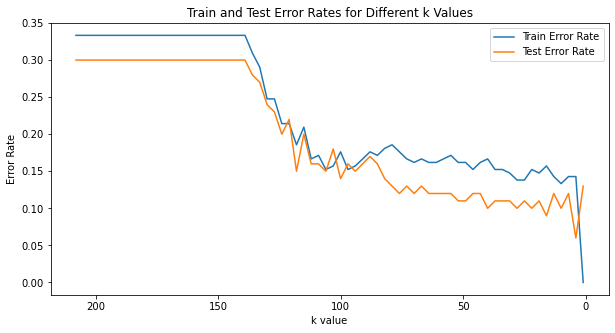

In [13]:

# Plotting the train and test error rates
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_errors, label='Train Error Rate')
plt.plot(k_values, test_errors, label='Test Error Rate')
plt.gca().invert_xaxis()  # Invert x-axis to have the highest k on the left
plt.legend()
plt.xlabel('k value')
plt.ylabel('Error Rate')
plt.title('Train and Test Error Rates for Different k Values')
plt.show()


In [14]:
best_k = k_values[test_errors.index(min(test_errors))]
print('best k: ', best_k)
print('test error: ', min(test_errors))

best k:  4
test error:  0.06000000000000005


ii Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

ii Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2


In [15]:
X_test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484
1,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454
2,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035
3,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472
4,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504
...,...,...,...,...,...,...
95,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
96,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
97,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
98,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Recalculate metrics for k_star
classifier = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)

# Confusion matrix and other metrics
conf_matrix = confusion_matrix(y_test, test_pred)
report = classification_report(y_test, test_pred)
print(conf_matrix)

[[25  5]
 [ 1 69]]


In [17]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [18]:
tn, fn, tp, fp = conf_matrix[0][0], conf_matrix[1][0], conf_matrix[1][1], conf_matrix[0][1]
tpr =  tp / (tp + fn)
tnr = tn / (fp + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * (precision * recall) / (precision + recall)
print("true positive : ", tp)
print("true negative : ", tn)
print("false positive : ", fp)
print("false negative : ", fn)
print("f1score: ", f1score)
print("true positive rate: ", tpr)
print("true negative rate: ", tnr)
print("f1score: ", f1score)

true positive :  69
true negative :  25
false positive :  5
false negative :  1
f1score:  0.9583333333333333
true positive rate:  0.9857142857142858
true negative rate:  0.8333333333333334
f1score:  0.9583333333333333


iii Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of trainingset is N ∈ {10,20,30,...,210}.

In [19]:
best_k_list=[]
min_test_error=[]
min_train_error=[]
training_test_size=[]

for i in range(10,211,10):
    training_test_size.append(i)
    Training_data_filtered = pd.concat([Training_data[Training_data["class"] == 0].iloc[0: i // 3, :], 
                                    Training_data[Training_data["class"] == 1].iloc[0: i - i // 3, :]])

    k_range=range(1, i, 5)
    k_values,train_errors, test_errors = find_test_error(Training_data_filtered, Testing_data, k_range)

    best_k = k_values[test_errors.index(min(test_errors))]
    best_k_list.append(best_k)
    min_test_error.append(min(test_errors))
    min_train_error.append(min(train_errors))
#     min_train_error.append(min(train_errors))
# print(k_values[min_test_error.index(min(min_test_error))])
print("min_erorr: ",min(min_test_error))

print("best_k: ", best_k)
training_error_2=min(min_train_error)

min_erorr:  0.07999999999999996
best_k:  6


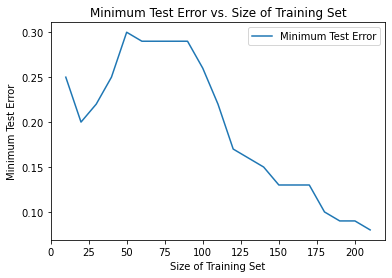

In [20]:
plt.plot(training_test_size, min_test_error, label='Minimum Test Error')

plt.xlabel('Size of Training Set')
plt.ylabel('Minimum Test Error')
plt.title('Minimum Test Error vs. Size of Training Set')
plt.legend()
plt.show()

## (d) Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.
B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?
C. which becomes Chebyshev Distance with p → ∞

d.i.a Manhattan Distance with p=1

In [21]:
summary_dict={}

In [22]:

k_values = []
test_errors = []
train_errors = []
for k in range(1, 197, 5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='uniform')
    classifier.fit(X_train, y_train)

    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)

    test_errors.append(1 - accuracy_score(y_test, test_pred))
    train_errors.append(1 - accuracy_score(y_train, train_pred))
    
min_test_error_value = min(test_errors)
min_test_error_indices = [index for index, value in enumerate(test_errors) if value == min_test_error_value]
best_ks = [k_values[i] for i in min_test_error_indices]

# Create a df from the best k values and their min errors
results_df = pd.DataFrame({
    'Best k': best_ks,
    'Min Test Error': [min_test_error_value] * len(best_ks)
})


print(results_df)
summary_dict['manhattan_with_p1'] = results_df.to_dict(orient='list')


   Best k  Min Test Error
0       1            0.11
1       6            0.11
2      11            0.11
3      26            0.11


d.i.b minkowski with log10(p) ∈ {0.1,0.2,0.3,...,1}, use k =6

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are predefined

# Generate p values as 10^(0.1) to 10^(1)
p_values = [10**x for x in np.linspace(0.1, 1, 10)]
results = []

for p in p_values:
    classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=p)
    classifier.fit(X_train, y_train)

    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)

    test_error = 1 - accuracy_score(y_test, test_pred)
    results.append({
        'P': p,
        'log10(p)': np.log10(p),
        'test_error': test_error
    })

# Convert results to a DataFrame for pretty printing
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


           P  log10(p)  test_error
0   1.258925       0.1        0.09
1   1.584893       0.2        0.09
2   1.995262       0.3        0.08
3   2.511886       0.4        0.08
4   3.162278       0.5        0.08
5   3.981072       0.6        0.06
6   5.011872       0.7        0.07
7   6.309573       0.8        0.08
8   7.943282       0.9        0.09
9  10.000000       1.0        0.09


In [24]:
results_df = pd.DataFrame(results)

min_test_error_row = results_df.loc[results_df['test_error'].idxmin()]

best_p = min_test_error_row['P']
best_p_log = min_test_error_row['log10(p)']
best_p_error = min_test_error_row['test_error']

print(f'\nThe best p is: {best_p} (log10(p) = {best_p_log}), with a test error of: {best_p_error}')
summary_dict['minkowski']=[6,best_p_error]


The best p is: 3.9810717055349722 (log10(p) = 0.6), with a test error of: 0.06000000000000005


d.i.c which becomes Chebyshev Distance with p → ∞

In [25]:
#Chebyshev Distance
k_values=[]
test_errors = []
train_errors=[]
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    classifier.fit(X_train, y_train)

    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)
    train_errors.append(1 - accuracy_score(y_train, train_pred))
    test_errors.append(1 - accuracy_score(y_test, test_pred))
        
best_k_chebyshev = k_values[test_errors.index(min(test_errors))]
min_test_error=min(test_errors)
# plt.plot(k_values,test_errors)
training_error_5=min(train_errors)
summary_dict['Chebyshev']=[best_k_chebyshev,min_test_error]
# summary_dict

In [26]:
from tabulate import tabulate

table_data = [
    ['Optimal K Values', 'Corresponding Minimum Test Errors']
]

for key, value in summary_dict.items():
    if isinstance(value, list):  
        table_data.append([value[0], value[1]])

# Print the table
print(tabulate(table_data, headers='firstrow', tablefmt='grid'))


+--------------------+-------------------------------------+
|   Optimal K Values |   Corresponding Minimum Test Errors |
+====================+=====================================+
|                  6 |                                0.06 |
+--------------------+-------------------------------------+
|                 16 |                                0.08 |
+--------------------+-------------------------------------+


ii Mahalanobis distance

In [27]:


k_values = []
test_errors = []
train_errors = []

for k in range(1, 197, 5):
    k_values.append(k)
    
    # Calculate the Mahalanobis distance metric_params
    metric_params = {"VI": np.linalg.inv(np.cov(X_train.T))}
    
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='brute',weights='uniform', p=2,metric='mahalanobis', metric_params=metric_params)
    classifier.fit(X_train, y_train)

    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)
    
    train_errors.append(1 - accuracy_score(y_train, train_pred))
    test_errors.append(1 - accuracy_score(y_test, test_pred))

min_test_error_value = min(test_errors)
min_test_error_indices = [index for index, value in enumerate(test_errors) if value == min_test_error_value]
best_ks = [k_values[i] for i in min_test_error_indices]
print(f"Best k value(s): {best_ks}")
print(f"Minimum Test Error: {min_test_error_value}")

Best k value(s): [1, 6]
Minimum Test Error: 0.15000000000000002


In [28]:
summary_dict['Mahalanobis']=[best_ks,min_test_error_value]

In [29]:
data_for_df = []
for method, values in summary_dict.items():
    if isinstance(values, dict): 
        best_ks_str = ', '.join(map(str, values['Best k']))
        # Since all errors are the same for Manhattan, take the first error
        min_error = values['Min Test Error'][0]
        data_for_df.append({'Method': method, 'Best k': best_ks_str, 'Min Test Error': f"{min_error:.2f}"})
    else:
        data_for_df.append({'Method': method, 'Best k': str(values[0]), 'Min Test Error': f"{values[1]:.2f}"})

summary_df = pd.DataFrame(data_for_df)

print(summary_df.to_string(index=False))


           Method       Best k Min Test Error
manhattan_with_p1 1, 6, 11, 26           0.11
        minkowski            6           0.06
        Chebyshev           16           0.08
      Mahalanobis       [1, 6]           0.15


## e) Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [30]:
def weighted_score(metrics):
    k_values = []
    test_errors = []
    train_errors = []

    for k in range(1, 197, 5):
        k_values.append(k)
        classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metrics)
        classifier.fit(X_train, y_train)

        test_pred = classifier.predict(X_test)
        test_errors.append(1 - accuracy_score(y_test, test_pred))
        train_errors.append(1 - accuracy_score(y_train, classifier.predict(X_train)))

    return k_values, test_errors, train_errors

k_values_euclidean, test_errors_euclidean, train_errors_euclidean = weighted_score('euclidean')
k_values_manhattan, test_errors_manhattan, train_errors_manhattan = weighted_score('manhattan')
k_values_chebyshev, test_errors_chebyshev, train_errors_chebyshev = weighted_score('chebyshev')

def find_best_ks(k_values, test_errors):
    min_test_error = min(test_errors)
    best_ks = [k for k, error in zip(k_values, test_errors) if error == min_test_error]
    return best_ks, min_test_error

best_ks_euclidean, min_test_error_euclidean = find_best_ks(k_values_euclidean, test_errors_euclidean)
best_ks_manhattan, min_test_error_manhattan = find_best_ks(k_values_manhattan, test_errors_manhattan)
best_ks_chebyshev, min_test_error_chebyshev = find_best_ks(k_values_chebyshev, test_errors_chebyshev)

data_list = [
    ['euclidean', best_ks_euclidean, min_test_error_euclidean],
    ['manhattan', best_ks_manhattan, min_test_error_manhattan],
    ['chebyshev', best_ks_chebyshev, min_test_error_chebyshev]
]

df = pd.DataFrame(data_list, columns=['method', 'best_ks', 'min_test_error'])
print(df)


      method               best_ks  min_test_error
0  euclidean                   [6]            0.10
1  manhattan                  [26]            0.10
2  chebyshev  [16, 31, 36, 41, 61]            0.11


## (f) What is the lowest training error rate you achieved in this homework?

The lowest training error rate  is 0